# stable baseline ch3. OpenAI Gym

@author: wngks

### 목표  
#### 1. GYM 소개 및 작동 원리 
#### 2. GYM을 활용하여 강화학습을 하는 방법 이해 


GYM은 강화학습 알고리즘들의 성능을 측정하고, 비교할 수 있는 가상환경 시뮬레이터이다.

GYM에서 다양한 가상환경을 제공한다. 체스, 테니스, atari 등의 다양한 가상환경을 테스트할 수 있게 해준다.

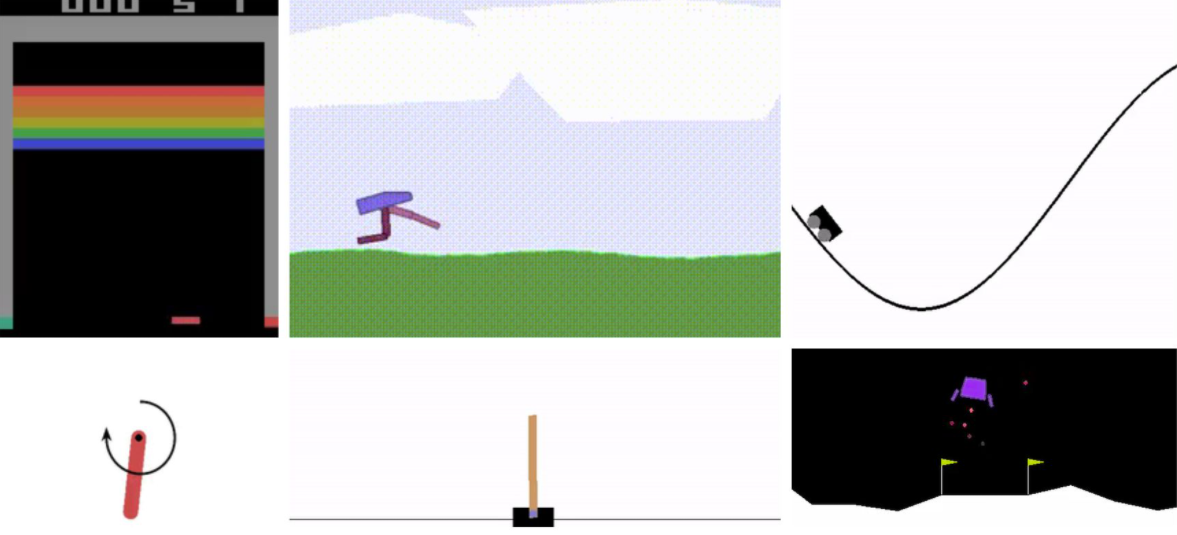

강화학습의 환경은 주어진 state에서 action을 취하면 다음 state와 reward를 주는 구조를 갖추어 만들면 된다.

예를 들어, 현재의 주식 가격이 주어져 있을 때( 며칠 간의 주식가격 추이나 주식관련 정보가 주어져 있을 때 ) 주식을 얼마나 살 것인지, 또는 보유하고있는 주식을 팔지 등 action을 취하면 다음 시점의 주식가격에 따라 수익이 발생하게 된다.
결국 실제 주식 가격 데이터가 실제 환경이 되므로 강화학습에 의해 투자전략을 만들 수 있을 것이다.



실생활 환경의 구축은 Gym에서 제공하는 모듈을 부모 모듈로 하여 맞춤형으로 만들 수 있어 Gym의 작동원리를 파악해야한다.

2021/1일 기준 GYM은 859개의 환경을 내장되어 있고 점차 현실 환경과 유사한 환경을 제공하고 있다.




In [1]:
import gym

### 환경 테스트

FrozenLake-v1 환경 불러와서 테스트. 
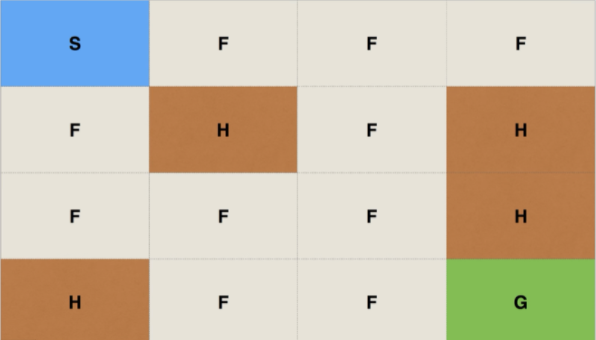

총 16개의 state 보유하고있고, state S에서 출발하여 H(함정)에 빠지지 않고 G에 도착하는 것을 목표 !

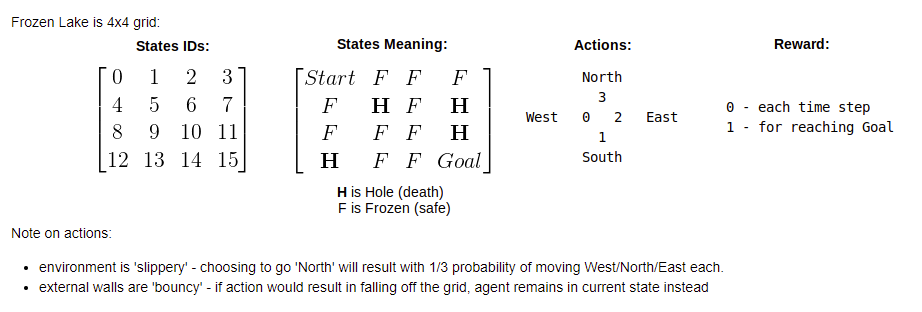


https://github.com/openai/gym/wiki/CartPole-v0

In [2]:
env = gym.make("FrozenLake-v1")
env.render()
env.close() # 환경 종료


SFFF
FHFH
FFFH
HFFG


gym.make() : 환경 생성

env.render() : 환경에서 현재 state를 위 프로그램 출력과 같이 보여준다. ( 갈색부분이 현재 state )

env.close() : 환경을 닫는 명령

## 환경정보


In [3]:
print(env.observation_space)    # env state 관측 : 이산(discrete) 연속(Box)
print(env.action_space)         # env action 종류 : 이산(discrete) 연속(Box) 
print(env.observation_space.n)  # env state의 length
print(env.action_space.n)       # env action의 length


Discrete(16)
Discrete(4)
16
4


observation_space는 state의 종류류 및 개수를 알려준다.  
Discrete(16), 즉 16개의 유한한 state로 구성되어있다. ->  state(0~15)


action_space는 action의 종류 및 개수를 알려준다. 
 유한한 4개의 action으로 구성되어있다.   -> action left : 0, down : 1, right : 2, up : 3

observation_space.n과 action_space.n은 각각 state와 action의 길이를 나타낸다. 

observation_space,action_space 가 연속형이면 Box(), 이산형이면 Discrete()


## 확률

P[state][action]은 $ \pi(action|state)$ 를 나타냅니다.

그 출력 값으로 ( transition 확률, 다음 state, reward, 그리고 다음 state가 terminal state인지 여부 ) 를 출력해준다.


In [6]:
#env.P[state][action]           # 다음 state가 나올 확률 [p(s'|s,a),s',r,Terminal 여부]
print(env.P[0][0])              # s'=0, r=0이 나올 확률은 0.66 s'=4,r=0이 나올 확률 0.33          
print(env.P[15][2])             # s'=15, r=0 이 나올확률 1, Terminal=True
print(env.P[5][1])              


[(0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 4, 0.0, False)]
[(1.0, 15, 0, True)]
[(1.0, 5, 0, True)]


위에서 볼 수 있듯이
$$ env.P[state][action] = [p(s'|s,a), s', r, terminal 여부] $$
를 출력한다

P[0][0] 코드에서는 state 0에서 action 0(Left)을 했을 때, 
0.66의 확률로 다음 state가 0이 나오고 reward 0을 받고 terminal False를 출력하고
0.33의 확률로 다음 state가 4이 나오고 reward 0을 받고 terminal False를 출력한다.

P[15][2] 에서는 state 15가 Goal 이므로 어떤 action을 해도 다음 state가 15일 확률은 1, reward=0, Termianl True가 나온다.


In [68]:

# 환경의확률 과정들 
for i in range(env.observation_space.n):
    for j in range(4):
        print("{},{} : ".format(i,j),env.P[i][j])
        

0,0 :  [(0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 4, 0.0, False)]
0,1 :  [(0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 4, 0.0, False), (0.3333333333333333, 1, 0.0, False)]
0,2 :  [(0.3333333333333333, 4, 0.0, False), (0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 0, 0.0, False)]
0,3 :  [(0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 0, 0.0, False)]
1,0 :  [(0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 5, 0.0, True)]
1,1 :  [(0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 5, 0.0, True), (0.3333333333333333, 2, 0.0, False)]
1,2 :  [(0.3333333333333333, 5, 0.0, True), (0.3333333333333333, 2, 0.0, False), (0.3333333333333333, 1, 0.0, False)]
1,3 :  [(0.3333333333333333, 2, 0.0, False), (0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 0, 0.0, False)]
2,0 :  [(0.3333333333333333, 2, 0.0, False), (0.333

## 환경 초기화 및 다음 스텝 진행


In [70]:
state = env.reset()
env.render()
print(env.step(1))
env.render()


SFFF
FHFH
FFFH
HFFG
(4, 0.0, False, {'prob': 0.3333333333333333})
  (Down)
SFFF
FHFH
FFFH
HFFG


env.reset은 환경을 초기화 시키는 것이다.

그리고 env.render에 의해 state의 모습을 볼 수 있다.

env.step(action) 은 현재 state에서 action을 했을때 결과로 [next_state, reward, terminal_여부,information]를 출력한다.

information은 현재  state에서 action을 했을때 next_state가 나올 확률을 알려준다.

env.step(1)은 state 0에서 action 1을 했을때에 결과로 [next_state, reward, teminal 여부, 확률 ]을 출력해준다. 


즉, 현재 state 0에서 action down(0)을 했을 때, next state=4, reward=0, termianl=false, 확률 = 0.33을 출력한다

그 후 다음 env.render를 통해 현재 state 위치를 확인할 수 있다.

## 전체 진행 

아래 코드는 임의의 action(random action)으로 총 20번의 반복을 실행하여 agent의 이동 경로를 살펴보는 프로그램이다. 

random action은  11번째 줄에 env.action_space.sample() 함수로 구현된다. 

이는 강화학습을 위해 환경의 정보를 수집할 때 주로 사용된다. 

In [25]:
import gym

env = gym.make('FrozenLake-v1')
state= env.reset()

print("Time step 0:")
env.render()

num_timesteps=20
for t in range(num_timesteps):
    random_action=env.action_space.sample()
    
    new_state, reward, done, info = env.step(random_action)
    print("timestep {}:".format(t+1))
        
    env.render()
    
    if done:
        break



Time step 0:

SFFF
FHFH
FFFH
HFFG
timestep 1:
  (Down)
SFFF
FHFH
FFFH
HFFG
timestep 2:
  (Left)
SFFF
FHFH
FFFH
HFFG
timestep 3:
  (Up)
SFFF
FHFH
FFFH
HFFG
timestep 4:
  (Left)
SFFF
FHFH
FFFH
HFFG
timestep 5:
  (Down)
SFFF
FHFH
FFFH
HFFG
timestep 6:
  (Up)
SFFF
FHFH
FFFH
HFFG
timestep 7:
  (Left)
SFFF
FHFH
FFFH
HFFG
timestep 8:
  (Up)
SFFF
FHFH
FFFH
HFFG
timestep 9:
  (Left)
SFFF
FHFH
FFFH
HFFG
timestep 10:
  (Up)
SFFF
FHFH
FFFH
HFFG
timestep 11:
  (Up)
SFFF
FHFH
FFFH
HFFG
timestep 12:
  (Down)
SFFF
FHFH
FFFH
HFFG
timestep 13:
  (Up)
SFFF
FHFH
FFFH
HFFG
timestep 14:
  (Down)
SFFF
FHFH
FFFH
HFFG
timestep 15:
  (Right)
SFFF
FHFH
FFFH
HFFG
timestep 16:
  (Down)
SFFF
FHFH
FFFH
HFFG


위 결과에서 state 0에서 임의로 action down을 취해 state 4로 이동하고, ... 

마지막에 timestep 15, state 8에서 action down를 하여 H에 빠져 timestep 16에서 종료가 된다.




### value_iteration() 

Gym을 활용하여 학습을 어떻게 진행하느냐 ! 

Dynamic Programming 이론을 바탕으로 진행 ! 

In [57]:
import numpy as np
import gym 
env= gym.make('FrozenLake-v1')

def value_evaluation(env):
    num_iterations=5000
    thre=1e-20 # threshold
    gamma=0.9 # 할인율 
    value_table=np.zeros(env.observation_space.n)
    
    for i in range(num_iterations):
        updated_value_table = np.copy(value_table)
        for s in range(env.observation_space.n):
            q_values=[sum([prob*(r+gamma*updated_value_table[s_]) 
                          for prob,s_,r,_ in env.P[s][a]])
                                for a in range(env.action_space.n)]
            value_table[s]=max(q_values)
        error = np.sum(np.fabs(updated_value_table-value_table))
        if error<=thre:
            break
    return value_table

def policy_improvement(value_table):
    gamma=0.9
    
    ## Policy 초기화 
    policy=np.zeros(env.observation_space.n)
    
    for s in range(env.observation_space.n):
        q_values=[sum([prob*(r+gamma*value_table[s_]) 
                          for prob,s_,r,_ in env.P[s][a]])
                         for a in range(env.action_space.n)]
        policy[s] = np.argmax(np.array(q_values))
    return policy

optimal_value_function= value_evaluation(env)
optimal_policy = policy_improvement(optimal_value_function)

print("optimal V : ",optimal_value_function)
print("optimal Pi :  ",optimal_policy)

obs = env.reset() # 환경 초기화
episode_reward=0.0
for _ in range(20):
    action=np.int_(optimal_policy[obs])
    obs,reward,done,info=env.step(action)
    env.render()
    episode_reward += reward
    print(done)
    if done:
        print('reward: ',episode_reward)
        episode_reward = 0
        obs = env.reset()
        break



optimal V :  [0.0688909  0.06141457 0.07440976 0.05580732 0.09185454 0.
 0.11220821 0.         0.14543635 0.24749695 0.29961759 0.
 0.         0.3799359  0.63902015 0.        ]
optimal Pi :   [0. 3. 0. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 2. 1. 0.]
  (Left)
SFFF
FHFH
FFFH
HFFG
False
  (Left)
SFFF
FHFH
FFFH
HFFG
False
  (Left)
SFFF
FHFH
FFFH
HFFG
False
  (Left)
SFFF
FHFH
FFFH
HFFG
False
  (Left)
SFFF
FHFH
FFFH
HFFG
False
  (Up)
SFFF
FHFH
FFFH
HFFG
False
  (Up)
SFFF
FHFH
FFFH
HFFG
False
  (Up)
SFFF
FHFH
FFFH
HFFG
False
  (Down)
SFFF
FHFH
FFFH
HFFG
False
  (Right)
SFFF
FHFH
FFFH
HFFG
False
  (Right)
SFFF
FHFH
FFFH
HFFG
False
  (Down)
SFFF
FHFH
FFFH
HFFG
False
  (Left)
SFFF
FHFH
FFFH
HFFG
False
  (Down)
SFFF
FHFH
FFFH
HFFG
False
  (Down)
SFFF
FHFH
FFFH
HFFG
True
reward:  1.0


이제 value iteration(가치 반복법) 방법을 통해 .FrozenLake-v1에 적용하여 최종 policy를 산출하였다!

먼저 value_evaluation() 함수에 의해 $V_\pi$ 를 업데이트 해준다. $$ V_\pi = max_a(Q_\pi(s,a)) $$ value_table[s]가 이에 해당한다.
 
 
그 후 policy_improvement로 state에서의 Q를 구하고 $ policy = argmax_a(Q_\pi(s,a))$로  새로운 policy를 구하고 있다. 

value_evaluation에서 $ V_{\pi^*}(s)$를 출력해주고 있고, policy imporvement에서 $ \pi^{*}(a|s) $를 출력해주고있다.
$ V_{\pi^*}(0)=0.068$ , $ V_{\pi^*}(5)=0$, $ V_{\pi^*}(14)=0.639$ 를 보이고 있고, state 0에서 action 0을, state 3에서는 action 3을,
state 14에서는 action 1이 최적 policy임을 보여준다. 

출력 결과를 보면 FrozenLake 환경에서 state 15 까지 도달하는 과정을 볼 수 있다.



## CartPole-v0 예제



In [15]:
%matplotlib notebook

import gym
env=gym.make('CartPole-v0')

env.render()

env.close()

검은색 cart위에 폴대가 세워져 있고 cart를 좌우로 이동하여 폴대가 쓰러지지 않게 하는 것이 목적이다. 폴대가 쓰러지거나 cart가 화면 밖으로 이탈하면 게임이 끝나게된다.

게임을 시작하여 terminal state에 도달하기 가지의 경로(trajectory)를 한 episode라고 말한다,. 이 episode는 서로 간 독립이므로 하나의 표본이 된다. 그러므로 model-free 강화학습에서 이러한 episode를 수없이 반복해 최적 policy를 추정하게 된다.


환경을 실행해보자.. 

In [7]:
import gym 
import matplotlib.pyplot as plt
%matplotlib inline
env=gym.make('CartPole-v1')
render=lambda:plt.imshow(env.render(mode='rgb_array'))
env.reset()
for _ in range(300):
    env.step(env.action_space.sample())
    env.render()
    
    
env.close()

C:\Users\wngks\anaconda3\envs\vision_project\lib\site-packages\gym\envs\classic_control\cartpole.py:150: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  logger.warn(


In [2]:
print(env.observation_space)
print(env.observation_space.shape)
print(env.action_space)


Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
(4,)
Discrete(2)


cartpole-v0의 state는 1D 텐서로 실숫값을 갖는 4개의 변수로 구성되어 있으며(Box((4,), float32)), 변수의 최솟값은 $-3.4 * 10^{38}$ 최댓값은 $3.4 * 10^{38}$임을 보여주고 있다. action space는 2개의 값을 갖는 이산형으로 push the cart to left : 0과 push the cart to right: 1로 구성되어 있다.

아래 프로그램과 같이 cartploe의 state는 $[cart~position,~cart~velocity,~pole~angle,~pole~velocity~at~the~tip]$으로 구성되어 있으며 4개의 변수 값의 최댓값과 최솟값을 각각 high, low 속성을 이용해 출력할 수 있다.

env.reset()은 시행할 때 마다 다른 값을 보여줄 것 이다.

Frozen Lake와 달리 Carpole의 초기 state는 random하게 결정되기 때문이다. 

In [3]:
print(env.reset())
print(env.observation_space.high)
print(env.observation_space.low)


[ 0.00915613 -0.00386181 -0.03777549 -0.04131747]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


CartPole은 매 action마다 cartpole이 세워져 있으면 +1의 reward, 

아래 프로그램마다 매 episode마다  50번의 임의 action을 시행해 terminal state에 도달할 때 까지 몇 번이나 pole이 세워져 있는가를 살펴볼 수 있다. 출력 결과를 보면 첫 번째 episode에서 11번 연속해 pole이 세워져 있었고, 21번째 episode에서는 42번 세워져있는 것으로 나타났다.

## MountainCar, Pendulum 환경

mountaincar환경은 우측상단 깃발에 자동차가 도달하는 것이고, Pendulum에서는 추를 좌우로 흔들어 추를 세우는 것이 목적이다.

In [8]:
import gym 
import matplotlib.pyplot as plt
%matplotlib inline
# env=gym.make('CartPole-v1')
#env=gym.make('MountainCar-v0')
env=gym.make('Pendulum-v1')

num_episodes=30
num_timesteps=50


render=lambda:plt.imshow(env.render(mode='rgb_array'))

for i in range(num_episodes):
    Return =0
    state= env.reset()
    
    for t in range(num_timesteps):
        env.render()
        random_action=env.action_space.sample()
        next_space, reward, done, _ = env.step(random_action)
        Return += reward
        
        if done:
            break
    if i%20==0:
        print('Episode:{}, Return:{}'.format(i,Return))
    
    
env.close()

Episode:0, Return:-377.87638861875087
Episode:20, Return:-243.66309132936422


Atari 게임 중 Pong-v0, SpaceInvaders-v0, Tennis-v0, Boxing-v4 등 다양한 환경을 사용할 수 있다. 

In [8]:
import gym,time
%matplotlib inline
#env=gym.make('Pong-ram-v0')
#env=gym.make('SpaceInvaders-v0')
#env = gym.make('ALE/Breakout-v5')
env = gym.make('LunarLander-v2')

env.reset()

num_episodes=5
num_timesteps=100


render=lambda:plt.imshow(env.render(mode='rgb_array'))

for i in range(num_episodes):
    Return =0
    state= env.reset()
    
    for t in range(num_timesteps):
        env.render()
        random_action=env.action_space.sample()
        next_space, reward, done, _ = env.step(random_action)
        Return += reward
        
        time.sleep(0.01)
        
        if done:
            break
    if i%10==0:
        print('Episode:{}, Return:{}'.format(i,Return))
    
        
env.close()



Episode:0, Return:-298.5503891289576


In [ ]:
import gym 
env=gym.make('Pong-v0')   # 3D tensor 형태로 데이터 제공 
print(env.observation_space)
print(env.reset())
env.close()


env=gym.make('Pong-ram-v0') # 1D tensor 형태로 데이터 제공 
print(env.observation_space)
print(env.reset())



In [ ]:
import gym
import time
%matplotlib inline
env = gym.make("BipedalWalker-v3")

print('observation space : ', env.observation_space)
print('action space : ', env.action_space)
print(env.action_space.low, env.action_space.high)

for i in range(10):
    state = env.reset()
    done = False
    while not done:
        env.render()

        action = env.action_space.sample()
        #print(action)
        next_state, reward, done, info = env.step(action)

        state = next_state

        time.sleep(0.1)

observation space :  Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf], (24,), float32)
action space :  Box([-1. -1. -1. -1.], [1. 1. 1. 1.], (4,), float32)
[-1. -1. -1. -1.] [1. 1. 1. 1.]


Mujoco library  ( Multi-Joint dynamics with Contact )

물리 엔진 3차원 환경 시물레이터이고 최근 DeepMind에 인수되어 무료로 풀려서 linux, mac 에서 사용가능 ..! 

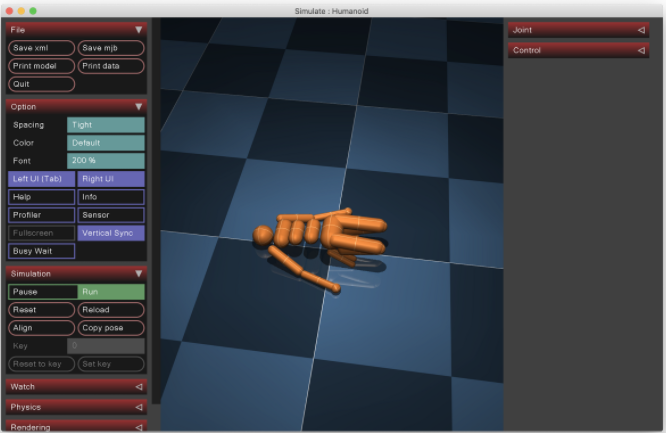


